In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import dask.dataframe as dd
rcParams['figure.figsize'] = 15, 6

In [35]:
#Pandas dataframes
air_passengers = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)


In [39]:
#Dask dataframes
air_passengers_dask = dd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'])
air_passengers_dask = air_passengers_dask.set_index(air_passengers_dask.Month)

In [37]:
#Pandas
log_air_passengers = np.log(air_passengers.Passengers)
log_air_passengers[1:10]

Month
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: Passengers, dtype: float64

In [40]:
#Dask
log_air_passengers_dask = np.log(air_passengers_dask.Passengers)
log_air_passengers_dask[1:10]

Month
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: Passengers, dtype: float64

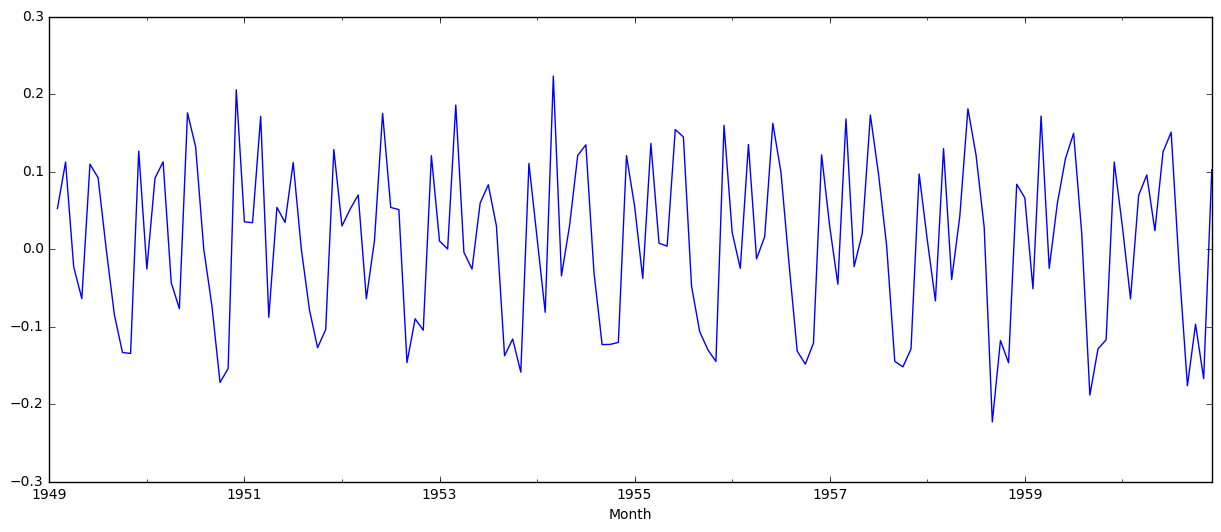

In [18]:
#Pandas
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot()

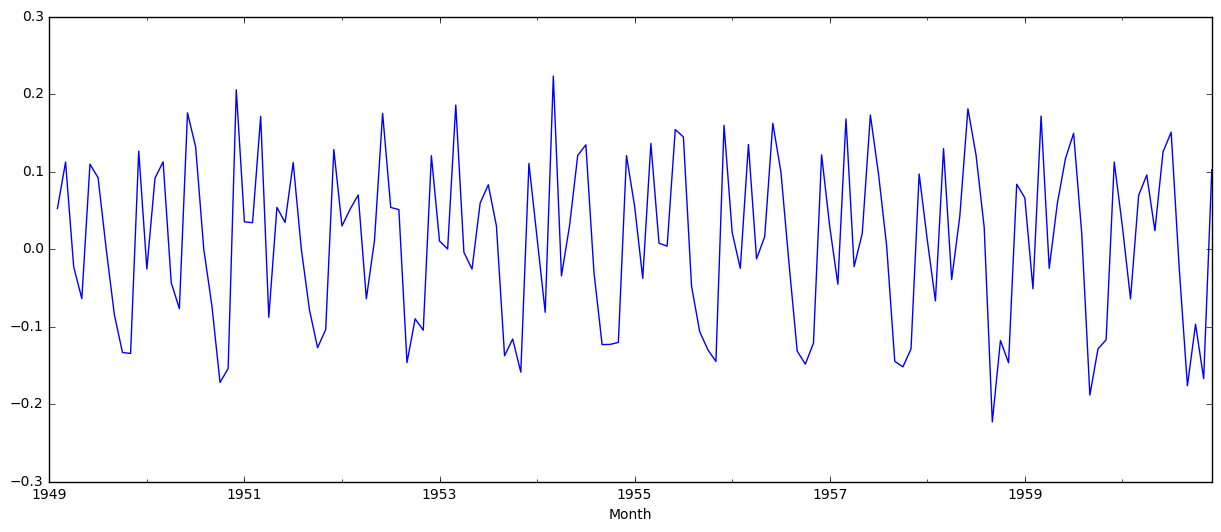

In [41]:
#Dask
log_air_passengers_diff_dask = log_air_passengers_dask - log_air_passengers_dask.shift()
log_air_passengers_diff_dask.plot()

In [19]:
#Pandas
log_air_passengers_diff.dropna(inplace=True)
log_air_passengers_diff[1:10]

Month
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
Name: Passengers, dtype: float64

In [42]:
#Dask
log_air_passengers_diff_dask.dropna(inplace=True)
log_air_passengers_diff_dask[1:10]

Month
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
Name: Passengers, dtype: float64

In [ ]:
# Let's talk about the ARIMA model
# Auto-Regressive Integrated Moving Average
# In this case we're talking about a series with dependence among values (more natural)

In [ ]:
# Nothing but a linear regression with a few times
# 1. The number of Auto-Regressive Terms (p)
# 2. The number of Moving Average Terms (q)
# 3. The number of differences

In [21]:
#Pandas
type(log_air_passengers_diff.index)

pandas.tseries.index.DatetimeIndex

In [43]:
#Dask
type(log_air_passengers_diff_dask.index)

pandas.tseries.index.DatetimeIndex

In [45]:
# We don't pull these out of thin air, but rather draw them from the data
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(log_air_passengers_diff.values, nlags = 20)
lag_pacf = pacf(log_air_passengers_diff.values, nlags = 20)

In [47]:
# We don't pull these out of thin air, but rather draw them from the data
from statsmodels.tsa.stattools import acf, pacf

lag_acf_dask = acf(log_air_passengers_diff_dask.values, nlags = 20)
lag_pacf_dask = pacf(log_air_passengers_diff_dask.values, nlags = 20)

In [ ]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')

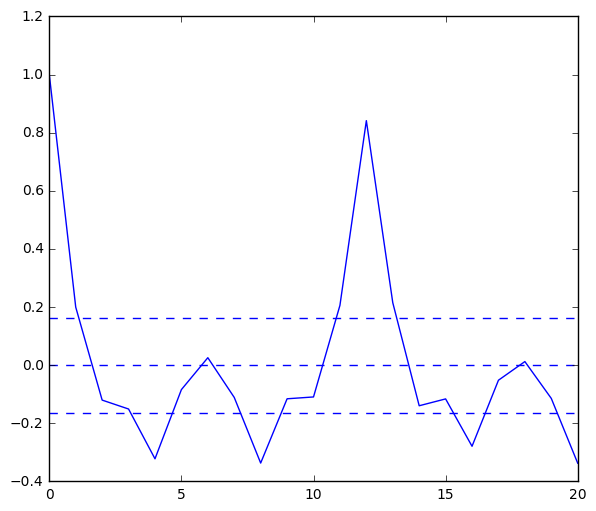

In [48]:
plt.subplot(121) 
plt.plot(lag_acf_dask)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff_dask)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff_dask)),linestyle='--')

In [ ]:
plt.subplot(121) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')

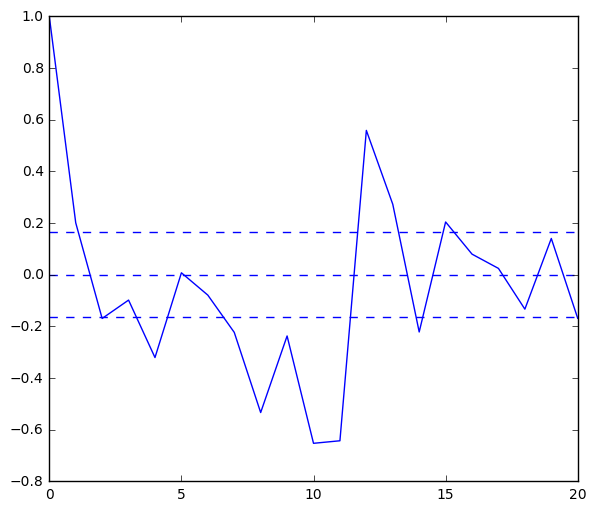

In [49]:
plt.subplot(121) 
plt.plot(lag_pacf_dask)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff_dask)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff_dask)),linestyle='--')

In [ ]:
# look at where teh plot crosses the upper confidence interval for the first time
# for PACF this is 2 and gives us the p value

# same # for ACF gives q value

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# AR model
model = ARIMA(log_air_passengers, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_air_passengers_diff)**2))

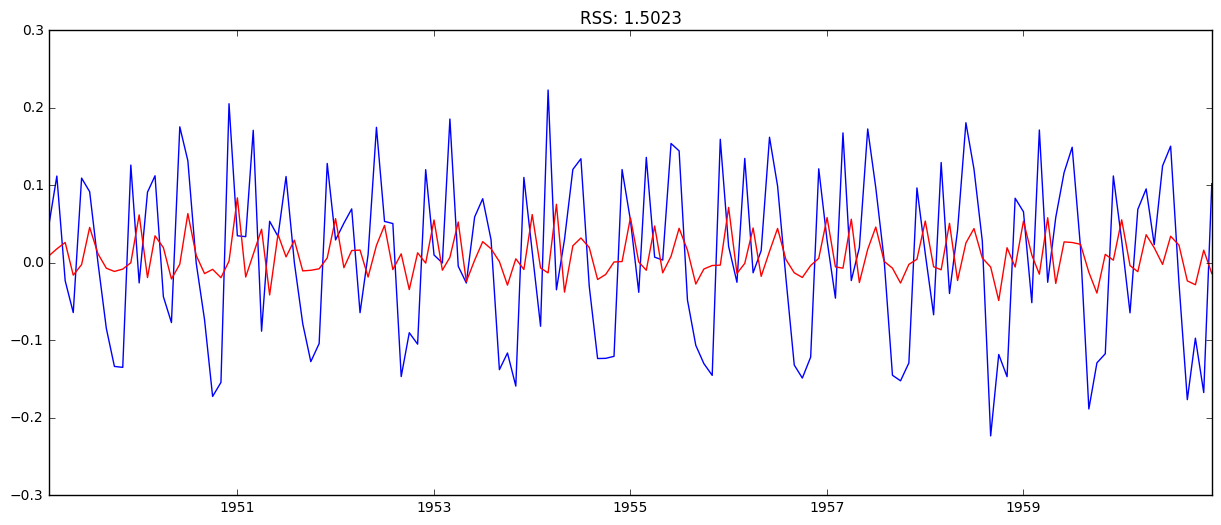

In [52]:
# AR model
model_dask = ARIMA(log_air_passengers_dask, order=(2, 1, 0))  
results_AR_dask = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff_dask)
plt.plot(results_AR_dask.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR_dask.fittedvalues-log_air_passengers_diff)**2))

NameError: name 'results_MA' is not defined

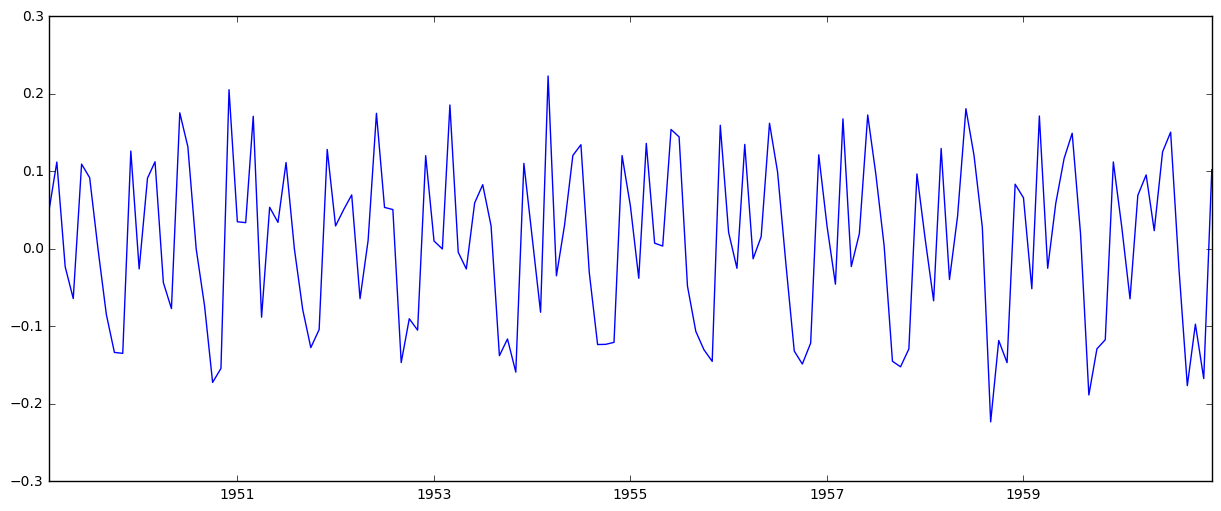

In [54]:
# MA model
model = ARIMA(log_air_passengers_dask, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA_dask.fittedvalues-log_air_passengers_diff)**2))

In [ ]:
# MA model
model = ARIMA(log_air_passengers_dask, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_air_passengers_diff)**2))

In [ ]:
model = ARIMA(log_air_passengers, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_air_passengers_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(log_air_passengers.ix[0], index=log_air_passengers.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(air_passengers)
plt.plot(predictions_ARIMA)